%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. I replaced it with my own key
oml.config.apikey = '46c76cc89a9b46f9e43f3c4be1f2885e'

Class label: 9


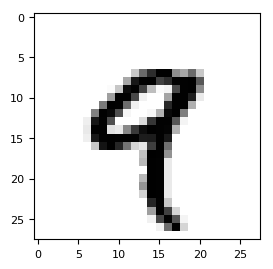

In [3]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y
plt.imshow(X[4].reshape(28, 28), cmap=plt.cm.gray_r) # Take the first example, reshape to a 28x28 image and plot
print("Class label:",y[4]) # Print the correct class label

The predictive accuracy of the model is 0.97. It takes about 20 minutes to calculate this. 


In [4]:
#test set accuracy is 0.97 btw for the whole set that took 20 minutes or so to calculate

from sklearn.model_selection import train_test_split # Importing splitting function to train and test model
from sklearn.neighbors import KNeighborsClassifier   # Import kNN function

X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)      
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Getting the score of our model on the test data.
print("Score: {:.2f}".format(knn.score(X_test, y_test)))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Score: 0.97


### Examples misclassifications
The shown pictures below are examples where the model predicted wrongly. 
Some of the numbers are quite easy to recognise for a human such as the 3 that is first shown. Maybe the model classified it differently because the bottom line of the three is thinner than the top line.
The second number would be diffucult to classify even for a human being since it is written quite badly. And still others look just more like a different number than the label says. The 5 is sometimes mistaken for a three and a 8 is misclassified a couple of times in the examples shown below.

Class label: 3
Label given by the model:  7


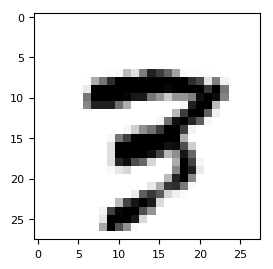

Class label: 8
Label given by the model:  1


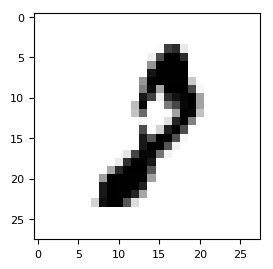

Class label: 0
Label given by the model:  6


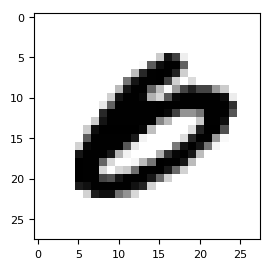

Class label: 3
Label given by the model:  5


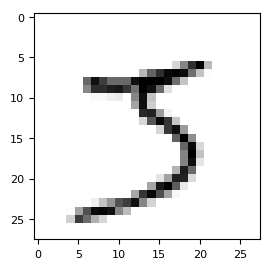

Class label: 8
Label given by the model:  3


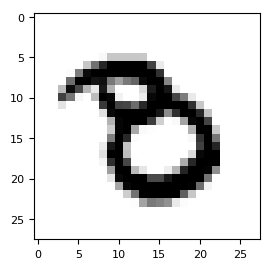

Class label: 5
Label given by the model:  3


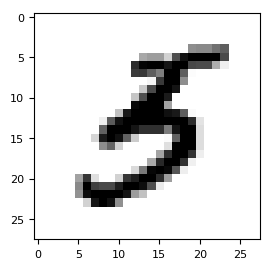

Class label: 8
Label given by the model:  9


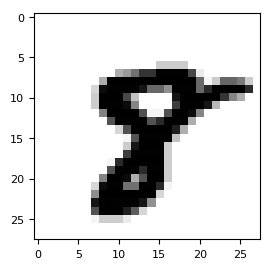

Class label: 9
Label given by the model:  7


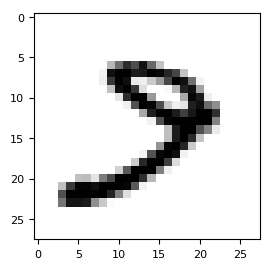

Class label: 9
Label given by the model:  4


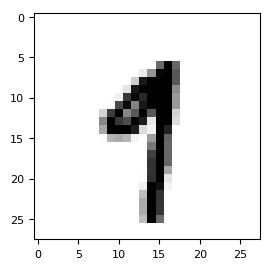

Class label: 2
Label given by the model:  9


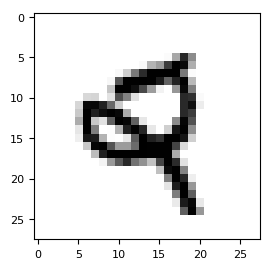

In [11]:
#Finding a few misclassification. This code only shows the last image with the correct label, but does not show the other 5.
j = 0
i = 0
k = 10 #Change the value for k if you want to see a different picture.
while i < k:  
    if y_pred[j] != y_test[j]: 
        print("Class label:",y_test[j])
        print("Label given by the model: ",y_pred[j])
        plt.imshow(X_test[j].reshape(28, 28), cmap=plt.cm.gray_r)
        plt.show()
        i = i + 1
        j = j + 1
    else:
        j += 1

### 10 fold Cross Validation on stratified subsample

Using 10 fold crossvalidation a plot is made that shows the misclassficiation rate against the value of k.
It shows that the model rather quickly starts to underfit and becomes too simplistic. This is because at larger values of k the model starts performing worse quite rapidly. The optimal k is 1. This makes sense because handwriting is very typical and differs highly between people. If k is very large is means that a large number of data points are taken into account that could quite possibly be different numbers.

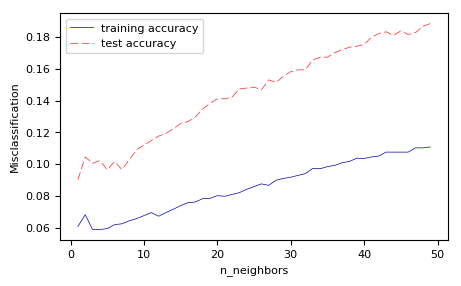

In [7]:
from sklearn.model_selection import KFold #Import function to do stratified cross validation
from sklearn.model_selection import cross_val_score #Import CV function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#I am importing this so that we can run this code without the running the other code that takes very long.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Making a subset. This needs to be 7000 for the final calculations but for now 700 will do for testing I think
#NEEDS TO BE 7000 for final answer!!!!!!
X_smal = X[:7000]
y_smal = y[:7000]

#So instead of the whole nmist data-set we only use the first 700 cases
X_train, X_test, y_train, y_test = train_test_split(X_smal, y_smal, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, stratify=y)

# Build a list of the training and test scores for increasing k to use this to make a plot later on
training_accuracy = []
test_accuracy = []

# testing 1 to 10 nearest neighbours
k = range(1, 50)   

#This line makes 10 cross validation pieces. I think that the shuffle prevents having one class in one fold which would mess up  
#the model.But now I am assuming that the first 700 cases that we use from the nmist set have already a random distribution of numbers.
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    train_score = cross_val_score(clf, X_train, y_train, cv=kfold)
    test_score = cross_val_score(clf, X_test, y_test, cv=kfold)
    #This piece of code is here so that only 1 value is given to the list instead of 10
    train_score_average = 1-(train_score.mean()) # The 1 minus part is added to get the misclassifications instead of the correct classifications
    test_score_average = 1-(test_score.mean())
    training_accuracy.append(train_score_average)
    test_accuracy.append(test_score_average)

#Plotting the graph
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Misclassification")
plt.xlabel("n_neighbors")
_ = plt.legend()



### 100 Bootstrapping on stratified subsample

Now using 100 bootstrap repeats instead of 10 fold crossvalidation. The plot obtained here shows that the misclassifications curve is more fluent, but it still shows a similair behavior in the sense that a larger k value leads to more misclassifications.
The optimal k value is again around 1  which is the same value suggested by the cross validation method. Based on these results, we argue that the optimal value of k should be 1. Apparantly there is for each data point only one other data point that can predict the actual value the best. Since it is about handwriting, this is not that weird, because people in general have a very unique handwriting style. 

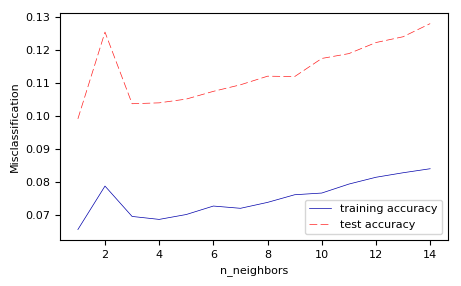

In [26]:
#Now doing the same as before but now with 100 bootstrapping repeats.
from sklearn.model_selection import ShuffleSplit #Need this to do the shuffle
from sklearn.model_selection import cross_val_score #Import CV function
from sklearn.neighbors import KNeighborsClassifier   # Import kNN function


#I am importing this so that we can run this code without the running the other code that takes very long.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Making a 10% subset. This needs to be 7000 for the final calculations but for now 700 will do for testing I think
#NEEDS TO BE 7000 for final answer!!!!!!

X_small = X[:7000]
y_small = y[:7000]

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, stratify=y_small)

# Build a list of the training and test scores for increasing k to use this to make a plot later on
training_accuracy = []
test_accuracy = []

# testing 1 to 15 nearest neighbours. From the previous cell it bacame clear that it should not have to larger than this
k = range(1, 15)  

# Taking 100 bootstrapping
shuffle_split = ShuffleSplit(test_size=.30, train_size=.70, n_splits=100) 

for n_neighbors in k:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training and test set accuracy
    train_score = cross_val_score(clf, X_train, y_train, cv=shuffle_split)
    test_score = cross_val_score(clf, X_test, y_test, cv=shuffle_split)
    #This piece of code is here so that only 1 value is given to the list instead of 10
    train_score_average = 1-(train_score.mean()) # The 1 minus part is added to get the misclassifications instead of the correct classifications
    test_score_average = 1-(test_score.mean())
    training_accuracy.append(train_score_average)
    test_accuracy.append(test_score_average)


#Plotting the graph
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Misclassification")
plt.xlabel("n_neighbors")
_ = plt.legend()

Running both the logistic regression as the linear SVM's with the default parameter settings.

On a stratified subsample of 10% of the original data: 
Logistic regression is :Training set score: 0.996 and Test set score: 0.838
Linear SVM is : Training set score: 0.965. Test set score: 0.844
Compared to the kNN model that has a test score of 0.97 both the logistic regression as the linear SVM score worse. But the kNN model was made on the complete data set instead of only 10% of it thus that might have caused the difference.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#I am importing this so that we can run this code without the running the other code that takes very long.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)

#X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, stratify=y)

#Making the logistic regression model and printing it
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#Making the linear SVC model and printing out the scores
linear_svm = LinearSVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linear_svm.score(X_test, y_test)))

Training set score: 0.996
Test set score: 0.838
Training set score: 0.964
Test set score: 0.844


### Logistic regression with varying C values for L1 and L2 penalty types

It might be a bit hard to obtain the results from the plot, but the printed numbers provide more precise values. 
For the L1 the test accuracy is highest at a C value between 0.001 and 0.01. The test score is between 0.88 and 0.86 Higher C values causes the model to overfit on the training data and therefore a lower score on the test is achieved.
For L2 the test accuracy is highest at C value of 0.0001 thus the smaller the better for L2. Again, higher values causes the model to overfit the training data and thus causes a poorer prediction on the test data. The test scores for both penalty types are lower at their optimum C value than the kNN method. Therefore we advise to use the kNN method for this dataset rather than logistic regression.

Training accuracy of L1 logreg with C=0.000: 0.86
Test accuracy of L1 logreg with C=0.000: 0.84
Training accuracy of L2 logreg with C=0.000: 0.97
Test accuracy of L2 logreg with C=0.000: 0.88
Training accuracy of L1 logreg with C=0.001: 0.92
Test accuracy of L1 logreg with C=0.001: 0.89
Training accuracy of L2 logreg with C=0.001: 0.98
Test accuracy of L2 logreg with C=0.001: 0.87
Training accuracy of L1 logreg with C=0.010: 0.96
Test accuracy of L1 logreg with C=0.010: 0.89
Training accuracy of L2 logreg with C=0.010: 0.99
Test accuracy of L2 logreg with C=0.010: 0.85
Training accuracy of L1 logreg with C=0.100: 0.99
Test accuracy of L1 logreg with C=0.100: 0.86
Training accuracy of L2 logreg with C=0.100: 1.00
Test accuracy of L2 logreg with C=0.100: 0.84
Training accuracy of L1 logreg with C=1.000: 1.00
Test accuracy of L1 logreg with C=1.000: 0.84
Training accuracy of L2 logreg with C=1.000: 1.00
Test accuracy of L2 logreg with C=1.000: 0.83


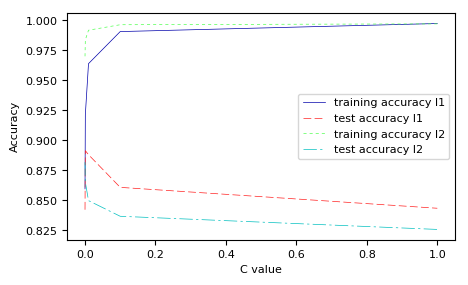

In [24]:
from sklearn.linear_model import LogisticRegression

#I am importing this so that we can run this code without the running the other code that might take a long time.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, stratify=y)

l1_training_accuracy = []
l1_test_accuracy = []
l2_training_accuracy = []
l2_test_accuracy = []

#Iterating through different values for C and printing out these scores for these different values
numbers = [0.0001, 0.001, 0.01, 0.1, 1] # Can always add more values for C if needed
for C in numbers:
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    lr_l1_train_score = lr_l1.score(X_train, y_train)
    lr_l1_test_score = lr_l1.score(X_test, y_test)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1_train_score))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1_test_score))
    lr_l2 = LogisticRegression(C=C, penalty="l2").fit(X_train, y_train)
    lr_l2_train_score = lr_l2.score(X_train, y_train)
    lr_l2_test_score = lr_l2.score(X_test, y_test)
    print("Training accuracy of L2 logreg with C={:.3f}: {:.2f}".format(C, lr_l2_train_score))
    print("Test accuracy of L2 logreg with C={:.3f}: {:.2f}".format(C, lr_l2_test_score))
    #Putting the calculated score in the arrays 
    l1_training_accuracy.append(lr_l1_train_score)
    l1_test_accuracy.append(lr_l1_test_score)
    l2_training_accuracy.append(lr_l2_train_score)
    l2_test_accuracy.append(lr_l2_test_score)
   
#Plotting the graph
plt.plot(numbers, l1_training_accuracy, label="training accuracy l1")
plt.plot(numbers, l1_test_accuracy, label="test accuracy l1")
plt.plot(numbers, l2_training_accuracy, label="training accuracy l2")
plt.plot(numbers, l2_test_accuracy, label="test accuracy l2")
plt.ylabel("Accuracy")
plt.xlabel("C value")
#plt.set_xscale('log')
#plt.ylim(0.85, 0.9)
_ = plt.legend()

### SVM with varying C penalty values for L1 and L2 types on 10% stratified subsample

The test scores values are always the same irregardless of the C value used. There is a difference between the penalty type used but fot both the L1 and L2 type, the test score do not change when the C value is changed. 
L1 has a test score of 0.93 and L2 0.86 which are both lower than the kNN method sofor this particular dataset it is better to use the kNN method than the linear SVM based on the results obtained here.

Training accuracy of L1 SVM with C=0.010: 1.00
Test accuracy of L1 SVM with C=0.010: 0.93
Training accuracy of L2 SVM with C=0.010: 0.99
Test accuracy of L2 SVM with C=0.010: 0.85
Training accuracy of L1 SVM with C=0.100: 1.00
Test accuracy of L1 SVM with C=0.100: 0.93
Training accuracy of L2 SVM with C=0.100: 0.98
Test accuracy of L2 SVM with C=0.100: 0.85
Training accuracy of L1 SVM with C=1.000: 1.00
Test accuracy of L1 SVM with C=1.000: 0.93
Training accuracy of L2 SVM with C=1.000: 0.99
Test accuracy of L2 SVM with C=1.000: 0.85
Training accuracy of L1 SVM with C=10.000: 1.00
Test accuracy of L1 SVM with C=10.000: 0.93
Training accuracy of L2 SVM with C=10.000: 0.99
Test accuracy of L2 SVM with C=10.000: 0.84


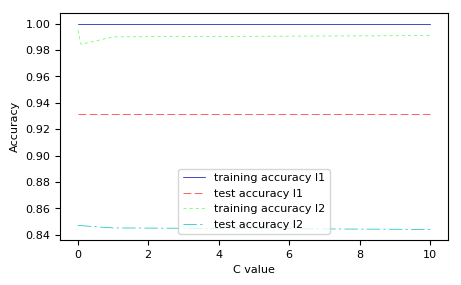

In [32]:
from sklearn import svm
from sklearn.model_selection import train_test_split # Importing splitting function to train and test model
from sklearn.svm import LinearSVC

#I am importing this so that we can run this code without the running the other code that might take a long time.
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute)
#Making a subset. This cell need to run on the whil data set for the final answer
X_small = X[:7000]
y_small = y[:7000]

#Taking a stratified subsample
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, stratify=y)
#Taking a very small subsample
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, random_state=0, stratify=y_small)

l1_training_accuracy = []
l1_test_accuracy = []
l2_training_accuracy = []
l2_test_accuracy = []

#Iterating through different values for C and printing out these scores for these different values
numbers = [0.01, 0.1, 1, 10] # Can always add more values for C if needed
for C in numbers:
    svm_l1 = svm.SVC(C=C, kernel='linear').fit(X_train, y_train)
    svm_l1_train_score = svm_l1.score(X_train, y_train)
    svm_l1_test_score = svm_l1.score(X_test, y_test)
    print("Training accuracy of L1 SVM with C={:.3f}: {:.2f}".format(C, svm_l1_train_score))
    print("Test accuracy of L1 SVM with C={:.3f}: {:.2f}".format(C, svm_l1_test_score))
    svm_l2 = LinearSVC(C=C, penalty='l2', loss='squared_hinge').fit(X_train, y_train)
    svm_l2_train_score = svm_l2.score(X_train, y_train)
    svm_l2_test_score = svm_l2.score(X_test, y_test)
    print("Training accuracy of L2 SVM with C={:.3f}: {:.2f}".format(C, svm_l2_train_score))
    print("Test accuracy of L2 SVM with C={:.3f}: {:.2f}".format(C, svm_l2_test_score))
    #Putting the calculated score in the arrays 
    l1_training_accuracy.append(svm_l1_train_score)
    l1_test_accuracy.append(svm_l1_test_score)
    l2_training_accuracy.append(svm_l2_train_score)
    l2_test_accuracy.append(svm_l2_test_score)
   
#Plotting the graph
plt.plot(numbers, l1_training_accuracy, label="training accuracy l1")
plt.plot(numbers, l1_test_accuracy, label="test accuracy l1")
plt.plot(numbers, l2_training_accuracy, label="training accuracy l2")
plt.plot(numbers, l2_test_accuracy, label="test accuracy l2")
plt.ylabel("Accuracy")
plt.xlabel("C value")
#plt.set_xscale('log')
#plt.ylim(0.85, 0.9)
_ = plt.legend()